In [ ]:


# Author : Abhyuday Tripathi
# Date :  5-04-2020
# Ref. Book : Reinforcement Learning An Introduction





In [22]:
import numpy as np
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt

In [23]:
STATES = 12

In [24]:
board=[]
for i in range(3):
    row=[]
    for j in range(4):
        row.append(1)
    board.append(row)

In [25]:
up_transition = np.zeros((12,12))

In [26]:
board= np.array(board)

In [27]:
for i in range(STATES):
    x = 2-i//4   # Board[2][0] is state 1 and Board[0][3] is state 12
    y = 0+i%4
    if(x-1<0):
        up_transition[i][i] += 0.8
    else:
        up_transition[i][i+4] += 0.8
    if(y-1<0):
        up_transition[i][i] += 0.1
    else:
        up_transition[i][i-1] += 0.1
    if(y+1>3):
        up_transition[i][i] += 0.1
    else:
        up_transition[i][i+1] += 0.1
    
        
            
        

In [28]:
down_transition = np.zeros((12,12))
for i in range(STATES):
    x = 2-i//4   # Board[2][0] is state 1 and Board[0][3] is state 12
    y = 0+i%4
    if(x+1>2):
        down_transition[i][i] += 0.8
    else:
        down_transition[i][i-4] += 0.8
    if(y-1<0):
        down_transition[i][i] += 0.1
    else:
        down_transition[i][i-1] += 0.1
    if(y+1>3):
        down_transition[i][i] += 0.1
    else:
        down_transition[i][i+1] += 0.1
    

In [29]:
left_transition = np.zeros((12,12))
for i in range(STATES):
    x = 2-i//4
    y = 0+i%4    # Board[2][0] is state 1 and Board[0][3] is state 12
    if(x+1>2):
        left_transition[i][i] += 0.1
    else:
        left_transition[i][i-4] += 0.1
    if(y-1<0):
        left_transition[i][i] += 0.8
    else:
        left_transition[i][i-1] += 0.8
    if(x-1<0):
        left_transition[i][i] += 0.1
    else:
        left_transition[i][i+1] += 0.1

In [30]:
right_transition = np.zeros((12,12))
for i in range(STATES):
    x = 2-i//4   # Board[2][0] is state 1 and Board[0][3] is state 12
    y = 0+i%4
    if(x+1>2):
        right_transition[i][i] += 0.1
    else:
        right_transition[i][i-4] += 0.1
    if(y+1>3):
        right_transition[i][i] += 0.8
    else:
        right_transition[i][i+1] += 0.8
    if(x-1<0):
        right_transition[i][i] += 0.1
    else:
        right_transition[i][i+4] += 0.1

In [31]:
# filtering probabilities for the wall
for i in range(STATES):
    if(up_transition[i][5]!=0):
        up_transition[i][i]+=up_transition[i][5]
        up_transition[i][5]=0
    if(down_transition[i][5]!=0):
        down_transition[i][i]+=down_transition[i][5]
        down_transition[i][5]=0
        
    if(left_transition[i][5]!=0):
        left_transition[i][i]+=left_transition[i][5]
        left_transition[i][5]=0
    if(right_transition[i][5]!=0):
        right_transition[i][i]+=right_transition[i][5]
        right_transition[i][5]=0
        

In [32]:
# transition probabilities ( number_of_actions x number_of_from_states x number_of_to_states )
# channel 1 : for upward action
# channel 2 : for downward action
# channel 3 : left action
# channel 4 : Right action
probs = np.array([up_transition,down_transition,left_transition,right_transition])
## Transition probabilities for wall and terminal states
probs[0][11]*=0
probs[0][7]*=0
probs[0][5]*=0
probs[1][11]*=0
probs[1][7]*=0
probs[1][5]*=0
probs[2][11]*=0
probs[2][7]*=0
probs[2][5]*=0
probs[3][11]*=0
probs[3][7]*=0
probs[3][5]*=0

In [38]:
def valueIteration(t_probs,reward_dist,value,gamma=0.9):
    theta = 0.00000001
    delta = np.ones((12,1))
    history=[]
    while(np.max(delta)>=theta):
        
        delta = np.zeros((12,1))
        v= value.copy()
        value = np.max(t_probs@reward_dist + (t_probs@value)*gamma,axis=0)
    
        delta = np.maximum(delta,np.absolute(v-value))
        #theta/=10
        
        history.append(np.max(delta))
    newVal = t_probs@reward_dist + (t_probs@value)*gamma
    policy = np.argmax(newVal,axis=0)
    return policy,value,history
        
    

In [39]:
## R(S)
rewards = np.array([-0.04,-0.04,-0.04,-0.04,-0.04,-100,-0.04,-1,-0.04,-0.04,-0.04,1]).reshape(12,1)
rew1 =  np.array([-2,-2,-2,-2,-2,0,-2,-1,-2,-2,-2,1]).reshape(12,1)
rew2 =  np.array([0.1,0.1,0.1,0.1,0.1,0,0.1,-1,0.1,0.1,0.1,1]).reshape(12,1)
rew3 =  np.array([0.02,0.02,0.02,0.02,0.02,0,0.02,-1,0.02,0.02,0.02,1]).reshape(12,1)
rew4 =  np.array([1,1,1,1,1,0,1,-1,1,1,1,1]).reshape(12,1)

In [40]:
policy,value,hist=valueIteration(probs,rewards,np.zeros((12,1)))
policy1,value1,hist1=valueIteration(probs,rew1,np.zeros((12,1)))
policy2,value2,hist2=valueIteration(probs,rew2,np.zeros((12,1)))
policy3,value3,hist3=valueIteration(probs,rew3,np.zeros((12,1)))
policy4,value4,hist4=valueIteration(probs,rew4,np.zeros((12,1)))



[[ 0.37526518  0.27917612  0.4438194  -0.73607153  0.48723473  0.
   0.58493384  0.          0.52343267  0.65014687  0.80124843  0.        ]
 [ 0.29464711  0.27917612  0.342217    0.28780626  0.31789318  0.
   0.23619401  0.          0.4347092   0.65014687  0.554111    0.        ]
 [ 0.29464711  0.30081699  0.27738698  0.35538582  0.38843399  0.
   0.32509611  0.          0.49832516  0.53744975  0.64784936  0.        ]
 [ 0.2830835   0.34091459  0.30846558  0.15186251  0.39952443  0.
  -0.68452003  0.          0.61046177  0.76620707  0.92818027  0.        ]]


(4, 12)

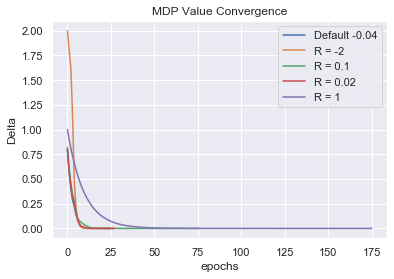

In [51]:

plt.title("MDP Value Convergence")
plt.xlabel("epochs")
plt.ylabel("Delta")
sns.lineplot(data=np.array(hist),legend="brief",label="Default -0.04")
sns.lineplot(data=np.array(hist1),legend="brief",label="R = -2")
sns.lineplot(data=np.array(hist2),legend="brief",label="R = 0.1")
sns.lineplot(data=np.array(hist3),legend="brief",label="R = 0.02")
sns.lineplot(data=np.array(hist4),legend="brief",label="R = 1")
plt.show()

In [44]:
#action_dict = ["up", "down","left","right"]
action_dict = ["\U00002B06","\U00002B07","\U00002B05","\U000027A1"] # action emojis
block ="\U0001F6A7" # wall

In [45]:
# visualizing policy

def showPolicy(policy):
    for i in range(12):
        x = 2-(11-i)//4   # Board[2][0] is state 1 and Board[0][3] is state 12
        y = 0+(11-i)%4
        
        board[x][y] = policy[11-i][0]
        
   
    
    for i in range(3):
        print("-----------------------------------")
        print()
        print("| ",end=" ")
        for j in range(4):
            
            if(i==1 and j==1):
                print(block,end="   |   ")
            elif(i==0 and j==3):
                print("\U0001F911"+"+1",end="  |  ")
            elif(i==1 and j==3):
                print("\U000026D4"+"-1",end="  |    ")
            else:    
                print(action_dict[board[i][j]],end="   |   ")
        print("\n")
    print("-----------------------------------")
  

In [61]:
# R(S) = -0.04
showPolicy(policy)
print("Value function : ",end=" ")
value.T

-----------------------------------

|  ➡   |   ➡   |   ➡   |   🤑+1  |  

-----------------------------------

|  ⬆   |   🚧   |   ⬆   |   ⛔-1  |    

-----------------------------------

|  ⬆   |   ➡   |   ⬆   |   ⬅   |   

-----------------------------------
Value function :  

array([[0.37526518, 0.34091459, 0.4438194 , 0.35538581, 0.48723473,
        0.        , 0.58493384, 0.        , 0.61046177, 0.76620707,
        0.92818027, 0.        ]])

In [62]:
# R(S) = -2
showPolicy(policy1)
print("Value function : ",end=" ")
value1.T

-----------------------------------

|  ➡   |   ➡   |   ➡   |   🤑+1  |  

-----------------------------------

|  ⬆   |   🚧   |   ➡   |   ⛔-1  |    

-----------------------------------

|  ➡   |   ➡   |   ➡   |   ⬆   |   

-----------------------------------
Value function :  

array([[-7.32008382, -5.66829053, -3.67777533, -1.68241734, -6.44563443,
         0.        , -1.50483402,  0.        , -4.56308366, -2.18374865,
         0.2907307 ,  0.        ]])

In [63]:
# R(S) = 0.1
showPolicy(policy2)
print("Value function : ",end=" ")
value2.T

-----------------------------------

|  ➡   |   ➡   |   ⬆   |   🤑+1  |  

-----------------------------------

|  ⬆   |   🚧   |   ⬆   |   ⛔-1  |    

-----------------------------------

|  ⬆   |   ⬅   |   ⬅   |   ⬅   |   

-----------------------------------
Value function :  

array([[0.99999997, 0.99999996, 0.99999996, 0.99999996, 0.99999997,
        0.        , 0.78021976, 0.        , 0.99999998, 0.99999998,
        0.99999998, 0.        ]])

In [64]:
# R(S) = 0.02
showPolicy(policy3)
print("Value function : ",end=" ")
value3.T

-----------------------------------

|  ➡   |   ➡   |   ➡   |   🤑+1  |  

-----------------------------------

|  ⬆   |   🚧   |   ⬆   |   ⛔-1  |    

-----------------------------------

|  ⬆   |   ⬅   |   ⬆   |   ⬅   |   

-----------------------------------
Value function :  

array([[0.63362864, 0.58254688, 0.59894495, 0.56512304, 0.70024006,
        0.        , 0.66063147, 0.        , 0.76971784, 0.85753004,
        0.94885366, 0.        ]])

In [65]:
# R(S) = 1.0
showPolicy(policy4)
print("Value function : ",end=" ")
value4.T

-----------------------------------

|  ⬆   |   ⬅   |   ⬅   |   🤑+1  |  

-----------------------------------

|  ⬆   |   🚧   |   ⬇   |   ⛔-1  |    

-----------------------------------

|  ⬆   |   ⬆   |   ⬇   |   ⬇   |   

-----------------------------------
Value function :  

array([[9.99999991, 9.99999991, 9.99999991, 9.99999991, 9.99999991,
        0.        , 8.79120871, 0.        , 9.99999991, 9.99999991,
        9.88044913, 0.        ]])